<a href="https://colab.research.google.com/github/smmohua/INFO-5731-Fall-22/blob/main/INFO5731_Assignment_Four_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

(1) Features (text representation) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [ ]:
# Write your code here

import pandas as pd
from google.colab import files
from gensim import corpora
from gensim.models import LsiModel
from gensim.models import LdaModel
from nltk.tokenize import RegexpTokenizer
from gensim.models.coherencemodel import CoherenceModel


In [ ]:
Nokia_reviews = pd.read_csv('/content/drive/MyDrive/Nokia Reviews.csv')
print(Nokia_reviews.Review)

0      This 55" 4K Nokia TV at this price point comes...
1      I must say it is best decision to by Nokia TV....
2      Flipcart delivered the Product in less than 24...
3      Pros1) Picture Quality is good, micro dimming ...
4      Value for money ....1) This tv has Everything ...
                             ...                        
995    I have reviewed ofter using 30 days. Tv is rea...
996    very good TV, Everything fine. Go for it.READ ...
997    The product does well for a budget TV.Good pic...
998                                   No thanksREAD MORE
999                                        goodREAD MORE
Name: Review, Length: 1000, dtype: object


In [ ]:
import os
import tweepy as tw
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

words = set(nltk.corpus.words.words())

def get_lemmatized_docs(X):
  stemmer = WordNetLemmatizer()
  eng_stop_word_list = stopwords.words("english")
  bag_of_words = []
  for sen in range(0, len(X)):
      # removing all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))

      # removing all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

      # removing multiple spaces and adding single space in place
      document = re.sub(r'\s+', ' ', document, flags=re.I)

      # removing the 'b' prefix added during byte conversion
      document = re.sub(r'^b\s+', '', document)

      # removing numbers
      document = re.sub(r'\d+','',document)

      # converting all words to lowercase
      document = document.lower()
      
      # Splitting the cleaned document into a list of words, which will be subsequently added to a bag after more processing
      document = document.split()
      document = [stemmer.lemmatize(word) for word in document]
      document = [word for word in document if word not in eng_stop_word_list]
      document = ' '.join(document)

      document = [word for word in nltk.wordpunct_tokenize(document) if word.lower() in words or not word.isalpha()]

      #Bag of words
      bag_of_words.append(document)

  return bag_of_words

df = pd.read_csv('/content/drive/MyDrive/Nokia Reviews.csv')
#df.dropna(how='any', inplace=True)
clean_docs  = get_lemmatized_docs(df["Review"])
print(len(clean_docs))
print(clean_docs)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


1000
[['k', 'price', 'point', 'come', 'almost', 'everything', 'expect', 'today', 'time', 'pro', 'con', 'according', 'experienced', 'pro', 'great', 'quality', 'display', 'thin', 'bezel', 'presence', 'almost', 'thin', 'bezel', 'change', 'whole', 'experience', 'high', 'resolution', 'wildlife', 'video', 'wa', 'amazed', 'see', 'detail', 'colour', 'sound', 'front', 'firing', 'speaker', 'could', 'experience', 'clear', 'vocal', 'tone', 'dialogue', 'read'], ['must', 'say', 'best', 'decision', 'device', 'feature', 'loaded', 'vision', 'astonishing', 'amazing', 'picture', 'quality', 'vision', 'intelligent', 'speaker', 'job', 'perfectly', 'steal', 'deal', 'guy', 'assistant', 'remote', 'coming', 'handy', 'thanks', 'quality', 'seamless'], ['product', 'really', 'amazed', 'quick', 'delivery', 'next', 'surprise', 'come', 'installation', 'received', 'message', 'installation', 'next', 'day', 'however', 'got', 'call', 'day', 'installation', 'wa', 'done', 'perfection', 'talk', 'sleek', 'compare', 'led', 'pi

In [ ]:
def get_corpus(docs):
    dictionary = corpora.Dictionary(docs)
    term_matrix = [dictionary.doc2bow(doc) for doc in docs]
    return dictionary,term_matrix

In [ ]:
text=get_lemmatized_docs(Nokia_reviews['Review'])
dictnry,docnt_term_matrix=get_corpus(text)
ldamodel = LdaModel(docnt_term_matrix, num_topics=10, id2word = dictnry, passes=20)
topics_str = ldamodel.print_topics(num_topics=10, num_words=10)

In [ ]:
for i in range(len(topics_str)):
  print("Topic:",i+1,"", topics_str[i])

Topic: 1  (0, '0.060*"screen" + 0.034*"bleeding" + 0.032*"read" + 0.024*"issue" + 0.023*"buy" + 0.019*"white" + 0.019*"patch" + 0.015*"black" + 0.014*"ha" + 0.013*"service"')
Topic: 2  (1, '0.038*"read" + 0.037*"issue" + 0.025*"product" + 0.019*"buy" + 0.013*"one" + 0.013*"month" + 0.012*"switch" + 0.010*"better" + 0.010*"need" + 0.010*"connectivity"')
Topic: 3  (2, '0.038*"read" + 0.025*"money" + 0.023*"product" + 0.022*"worst" + 0.016*"problem" + 0.014*"one" + 0.014*"buy" + 0.014*"waste" + 0.013*"time" + 0.013*"support"')
Topic: 4  (3, '0.036*"awesome" + 0.033*"quality" + 0.031*"sound" + 0.029*"read" + 0.025*"product" + 0.024*"picture" + 0.013*"great" + 0.012*"super" + 0.012*"need" + 0.012*"value"')
Topic: 5  (4, '0.021*"issue" + 0.017*"video" + 0.016*"read" + 0.015*"get" + 0.014*"time" + 0.012*"customer" + 0.011*"getting" + 0.010*"service" + 0.010*"led" + 0.010*"problem"')
Topic: 6  (5, '0.026*"read" + 0.025*"sound" + 0.024*"picture" + 0.023*"good" + 0.023*"k" + 0.020*"video" + 0.01

In [ ]:
top_topics = ldamodel.top_topics(docnt_term_matrix)
for i in range(len(top_topics)):
  print("Topic: ", i+1)
  print()
  for j in range(len(top_topics[i][0])):
    print(top_topics[i][0][j][1])
  print('=================================================================================================================================')


Topic:  1

quality
sound
good
picture
read
installation
wa
excellent
awesome
product
price
delivery
connectivity
great
like
also
value
day
go
amazing
Topic:  2

sound
read
quality
good
product
amazing
picture
price
nice
wa
really
budget
awesome
delivery
excellent
thank
also
experience
one
installation
Topic:  3

screen
bleeding
read
issue
buy
white
patch
black
ha
service
problem
display
product
day
quality
month
please
brand
go
light
Topic:  4

awesome
quality
sound
read
product
picture
great
super
need
value
connectivity
review
video
day
get
go
buy
best
good
play
Topic:  5

read
sound
picture
good
k
video
quality
best
ha
like
wa
well
screen
content
work
month
really
one
speaker
think
Topic:  6

good
read
product
money
value
nice
excellent
worth
price
remote
happy
great
working
service
sound
one
wa
overall
quality
time
Topic:  7

best
product
read
quality
sound
awesome
good
bad
value
buy
money
really
superb
like
installation
one
delivery
thank
vision
also
Topic:  8

issue
video
read
ge

In [ ]:
lsa_model_data = LsiModel(docnt_term_matrix, num_topics=10, id2word = dictnry)  
lsa_list = lsa_model_data.print_topics(num_topics=i, num_words=i)

In [ ]:
for i in range(len(lsa_list)):
    print("Topic:",i+1,"", lsa_list[i])


Topic: 1  (0, '0.416*"quality" + 0.396*"good" + 0.386*"sound" + 0.357*"read" + 0.280*"picture" + 0.199*"product" + 0.133*"wa" + 0.106*"installation" + 0.103*"best"')
Topic: 2  (1, '0.607*"good" + -0.456*"quality" + -0.298*"picture" + -0.263*"sound" + 0.200*"product" + 0.162*"installation" + 0.157*"wa" + 0.119*"issue" + -0.116*"best"')
Topic: 3  (2, '-0.608*"good" + 0.429*"product" + 0.324*"read" + -0.211*"quality" + 0.146*"buy" + 0.141*"issue" + 0.141*"screen" + 0.136*"wa" + -0.110*"picture"')
Topic: 4  (3, '0.640*"product" + -0.367*"issue" + -0.269*"screen" + -0.220*"read" + -0.186*"video" + -0.184*"bleeding" + -0.149*"remote" + 0.134*"installation" + 0.110*"excellent"')
Topic: 5  (4, '-0.521*"wa" + -0.388*"installation" + 0.378*"product" + -0.263*"delivery" + 0.181*"screen" + -0.158*"quality" + -0.152*"day" + 0.139*"sound" + 0.121*"good"')
Topic: 6  (5, '0.482*"quality" + 0.271*"issue" + 0.237*"screen" + -0.227*"read" + -0.223*"k" + -0.210*"sound" + -0.205*"value" + -0.188*"best" + 0

In [ ]:
top_topics_info = lsa_model_data.show_topics(formatted=False)

for i in range(len(top_topics_info)):
  print("Topic: ", i+1)
  print()
  for j in range(len(top_topics_info[i][1])):
    print(top_topics_info[i][1][j][0])
  print('=================================================================================================================================')


Topic:  1

quality
good
sound
read
picture
product
wa
installation
best
awesome
Topic:  2

good
quality
picture
sound
product
installation
wa
issue
best
awesome
Topic:  3

good
product
read
quality
buy
issue
screen
wa
picture
day
Topic:  4

product
issue
screen
read
video
bleeding
remote
installation
excellent
delivery
Topic:  5

wa
installation
product
delivery
screen
quality
day
sound
good
read
Topic:  6

quality
issue
screen
read
k
sound
value
best
product
money
Topic:  7

read
sound
money
value
quality
wa
screen
excellent
service
product
Topic:  8

bad
waste
installation
value
wa
person
money
screen
read
one
Topic:  9

sound
read
video
value
bad
money
great
excellent
quality
k
Topic:  10

best
buy
great
issue
bad
picture
one
price
k
waste


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
# Write your code here

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing
import numpy as np
#importing SVM and kNN algorithm modules
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
#importing f1_score, accuracy_score, recall_score, precision_score from sklearn
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Nokia Reviews_Sentiment Analysis.csv')

In [ ]:
df = df.fillna('neutral')
df

,Glimpse of Review,Review,sentiment
0,Review from Technology Gyan: Almost everything...,"This 55"" 4K Nokia TV at this price point comes...",positive
1,Brilliant,I must say it is best decision to by Nokia TV....,positive
2,Best in the market!,Flipcart delivered the Product in less than 24...,positive
3,Pretty good,"Pros1) Picture Quality is good, micro dimming ...",positive
4,Terrific purchase,Value for money ....1) This tv has Everything ...,negative
...,...,...,...
995,Perfect product!,I have reviewed ofter using 30 days. Tv is rea...,positive
996,"Classy product ,Good","very good TV, Everything fine. Go for it.READ ...",positive
997,Wonderful,The product does well for a budget TV.Good pic...,positive
998,Not good,No thanksREAD MORE,negative


In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=2000)
tfidf_vect.fit(df['Review'])

TfidfVectorizer(max_features=2000, token_pattern='\\w{1,}')

In [ ]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(df['Review'], df['sentiment'], test_size=0.2,random_state=50)


In [ ]:
def transform_train_data(train, test, vect):
  x_test_data =  tfidf_vect.transform(test)
  x_train_data =  vect.transform(train)

  return x_test_data, x_train_data

In [ ]:
def transform_test_data(train, test):
  encoder = preprocessing.LabelEncoder()
  y_valid = encoder.fit_transform(test)
  y_train = encoder.fit_transform(train)
  
  
  return y_valid, y_train

In [ ]:
x_train_data, x_test_data= transform_train_data(X_train_data, X_test_data, tfidf_vect)
y_train_data, y_test_data = transform_test_data(y_train_data, y_test_data)


In [ ]:
classif = LinearSVC()
classif.fit(x_train_data, y_train_data)
#predicting the test data
y_pred_data = classif.predict(x_test_data)
print("Accuracy_Score:", accuracy_score(y_test_data, y_pred_data))
print("Precision_score:",precision_score(y_test_data, y_pred_data, average='weighted', labels=np.unique(y_pred_data)))
print("Recall_score", recall_score(y_test_data, y_pred_data, average='weighted'))
print("F1_Score:", f1_score(y_test_data, y_pred_data, average='weighted'))


Accuracy_Score: 0.74
Precision_score: 0.7116834216835105
Recall_score 0.74
F1_Score: 0.7018483538048775


In [ ]:
classif = KNeighborsClassifier()

classif.fit(x_train_data, y_train_data)
#predicting the test data
y_pred_data = classif.predict(x_test_data)
print("Accuracy_Score:", accuracy_score(y_test_data, y_pred_data))
print("Precision_score:",precision_score(y_test_data, y_pred_data, average='weighted', labels=np.unique(y_pred_data)))
print("Recall_score", recall_score(y_test_data, y_pred_data, average='weighted'))
print("F1_Score:", f1_score(y_test_data, y_pred_data, average='weighted'))


Accuracy_Score: 0.72375
Precision_score: 0.6734924812030074
Recall_score 0.72375
F1_Score: 0.6931629563512898


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here

home_price_train = pd.read_csv("/content/drive/MyDrive/assignment4-question3-data/train.csv")
home_price_test = pd.read_csv("/content/drive/MyDrive/assignment4-question3-data/test.csv")


In [ ]:
home_price_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
home_price_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
home_price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
home_price_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

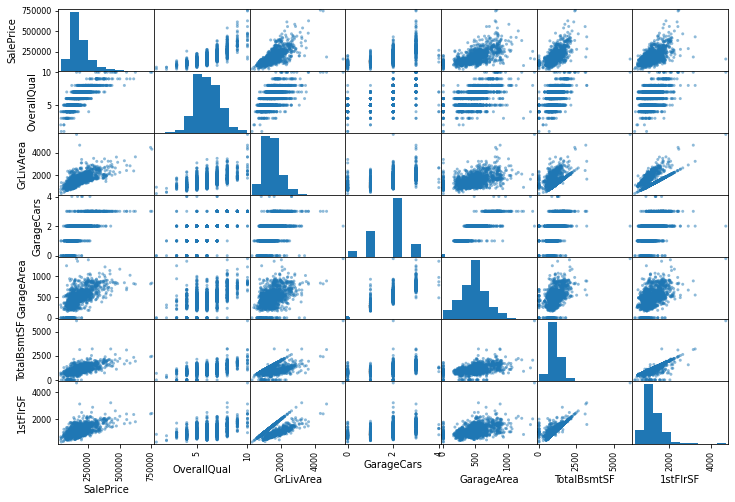

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']
scatter_matrix(home_price_train[attributes], figsize=(12, 8))
#savefig
plt.savefig('matrix.png')


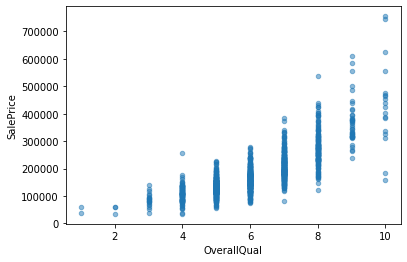

In [ ]:
home_price_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')


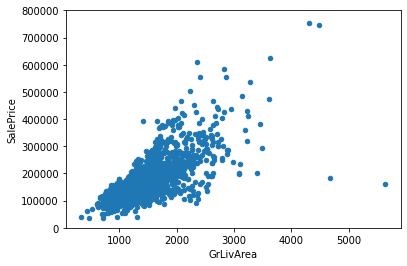

In [ ]:
plotted_data = pd.concat([home_price_train['SalePrice'], home_price_train['GrLivArea']], axis=1)
plotted_data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))


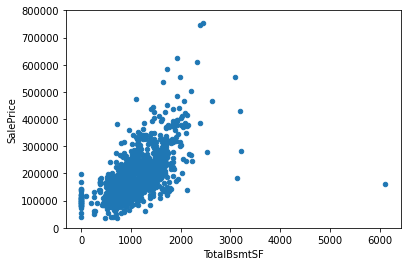

In [ ]:
plotted_data = pd.concat([home_price_train['SalePrice'], home_price_train['TotalBsmtSF']], axis=1)
plotted_data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

In [ ]:
from collections import Counter

column_cnt_train=home_price_train.select_dtypes(include=np.number).columns.tolist()
column_cnt_test=home_price_test.select_dtypes(include=np.number).columns.tolist()

colms=home_price_train.columns.values.tolist()
cnt= list((Counter(colms)-Counter(column_cnt_train)).elements())


In [ ]:
home_price_test[column_cnt_test]=home_price_test[column_cnt_test].fillna(0)
home_price_train[column_cnt_train]=home_price_train[column_cnt_train].fillna(0)
#repalcing the empty list as unlabelled using fillna
home_price_test[cnt]=home_price_train[cnt].fillna('Unlabeled')
home_price_train[cnt]=home_price_train[cnt].fillna('Unlabeled')

In [ ]:
home_price_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RL,80.0,11622,Pave,Unlabeled,Reg,Lvl,AllPub,...,120,0,Unlabeled,Unlabeled,Unlabeled,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Unlabeled,IR1,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Unlabeled,IR1,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,6,2010,WD,Abnorml
4,1465,120,RL,43.0,5005,Pave,Unlabeled,IR1,Lvl,AllPub,...,144,0,Unlabeled,Unlabeled,Unlabeled,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,FV,21.0,1936,Pave,Pave,Reg,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,6,2006,WD,Normal
1455,2916,160,RL,21.0,1894,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,Unlabeled,Unlabeled,0,4,2006,WD,Normal
1456,2917,20,RL,160.0,20000,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,MnPrv,Unlabeled,0,9,2006,WD,Normal
1457,2918,85,RL,62.0,10441,Pave,Unlabeled,Reg,Lvl,AllPub,...,0,0,Unlabeled,GdPrv,Shed,700,7,2006,WD,Normal


In [ ]:
training_set = pd.get_dummies(home_price_train, columns=cnt)
X_train_data=training_set.drop(['SalePrice', 'Id'],axis=1)
y_train_data=training_set['SalePrice']

In [ ]:
test_set = pd.get_dummies(home_price_test, columns=cnt)
x_test_data=test_set.drop(['Id'],axis=1)

In [ ]:
X_train_data= home_price_train[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]
y_train_data = home_price_train["SalePrice"]

X_test_data = home_price_test[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]

home_price_test.fillna(0, inplace = True)


In [ ]:
from sklearn.linear_model import LinearRegression
regress = LinearRegression()
regress.fit(X_train_data, y_train_data)


LinearRegression()

In [ ]:
regress.score(X_train_data, y_train_data)

0.761917951186283

In [ ]:
predictions_data = regress.predict(X_test_data)
predicted_prices = pd.DataFrame({'Sale Price prediction': predictions_data})

predicted_prices

,Sale Price prediction
0,113457.503265
1,165325.401681
2,157177.041113
3,179836.887801
4,227017.198181
...,...
1454,59852.316790
1455,78847.395196
1456,151715.379533
1457,92258.212328
